<div style=" background-color: green" >

<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Machine Learning</h1>

<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Détection automatique de faux billets</h2>

</div>

<div style="border: 2px solid green; padding: 20px; color: green; border-radius: 8px;">

<h2 style="margin: auto;">Etape 1 - Importation des bibliothèques</h2>

</div>


In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns


<div style="border: 2px solid green; padding: 20px; color: green; border-radius: 8px;">

<h2 style="margin: auto;">Etape 2 -  Chargement et analyse exploratoire des données</h2>

</div>


In [3]:
df=pd.read_csv("billets.csv" ,sep =';')

In [4]:
df.head(3)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16


- Analyse statistique du df

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagonal,1500.0,171.958440,0.305195,171.04,171.750,171.96,172.17,173.01
height_left,1500.0,104.029533,0.299462,103.14,103.820,104.04,104.23,104.88
height_right,1500.0,103.920307,0.325627,102.82,103.710,103.92,104.15,104.95
margin_low,1463.0,4.485967,0.663813,2.98,4.015,4.31,4.87,6.90
margin_up,1500.0,3.151473,0.231813,2.27,2.990,3.14,3.31,3.91
length,1500.0,112.678500,0.872730,109.49,112.030,112.96,113.34,114.44


- Idenitification des  variables numeriques et categorielles

In [6]:
num = df. select_dtypes(include=['int64', 'float64']).columns
print (list (num))
cat = df.select_dtypes(include=['object']).columns
print(list(cat))

['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']
[]


- identification de  la nature de chaque variable 

In [7]:
df.dtypes

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

<div style="border: 2px solid green; padding: 20px; color: green; border-radius: 8px;">

<h2 style="margin: auto;">Etape 3 -  Nettoyage et preparation des données</h2>

</div>


In [8]:
#Retourner le noms des colones de mon data frame
df.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

- identification des nan

In [9]:
pd.isnull(df).sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

- Valeur numerique remplacer par la mediane

In [10]:
df['margin_low'] = df['margin_low'].fillna(df['margin_low'].median())

- Identification des nan

In [11]:
pd.isnull(df).sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

<div style="border: 2px solid green; padding: 20px; color: green; border-radius: 8px;">

<h2 style="margin: auto;">Etape 4 -  Visualisation</h2>

</div>


- realisez une variable univariée de la variable cible

In [12]:
df["is_genuine"].value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

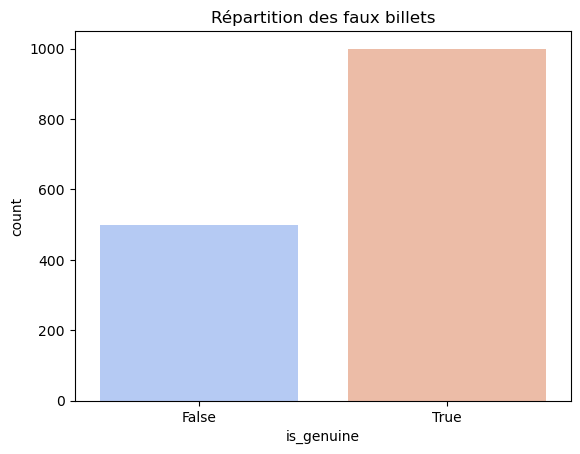

In [13]:
import matplotlib.pyplot as plt
sns.countplot(x="is_genuine", data=df, palette="coolwarm")
plt.title("Répartition des faux billets")
plt.show()


- Correlation entre variables

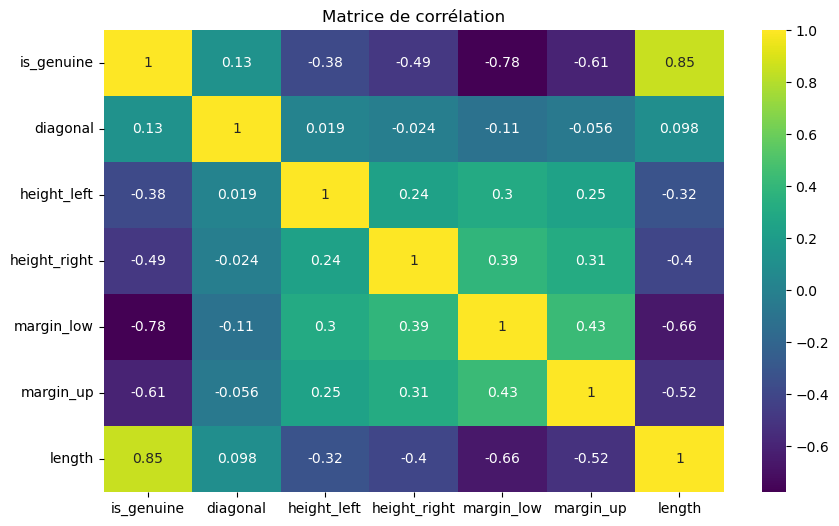

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title("Matrice de corrélation")
plt.show()


<div style="border: 2px solid green; padding: 20px; color: green; border-radius: 8px;">

<h2 style="margin: auto;">Etape 5 -  Modelisation</h2>

</div>


-  Informations sur les colonnes

In [15]:
df.info()  # Types de données et valeurs manquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [16]:
df["is_genuine"].value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

In [17]:
df.shape

(1500, 7)

<div style=" background-color: green" >

<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center"> 4.1- Construction du modéle</h2>

</div>

- Selectionner les variables indépendantes et la variable dépendante 

In [18]:
X= df.drop(columns=['is_genuine'])
y= df['is_genuine']

- Séparation du df en deux parties

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

X_train shape: (1200, 6)
X_test shape: (300, 6)


- Normalisation

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Shape X_train_scaled:", X_train_scaled.shape)
print("Shape X_test_scaled:", X_test_scaled.shape)

Shape X_train_scaled: (1200, 6)
Shape X_test_scaled: (300, 6)


<div style=" background-color: green" >

<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center"> 4.1.1- Regression logistique</h2>

</div>

In [21]:
!pip install imbalanced-learn


     ------------------------------------- 258.3/258.3 kB 30.5 kB/s eta 0:00:00
     ------------------------------------- 308.4/308.4 kB 10.9 kB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [22]:
X = df.drop(columns=['is_genuine'])
y = df['is_genuine']

In [23]:
# Séparation des données/train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Répartition après SMOTE : {False: 800, True: 800}
Seuil optimal basé sur F1-score : 0.5299033511453578

Classification report :
               precision    recall  f1-score   support

       False       0.99      0.99      0.99       100
        True       0.99      0.99      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


Confusion matrix :
 [[ 99   1]
 [  1 199]]


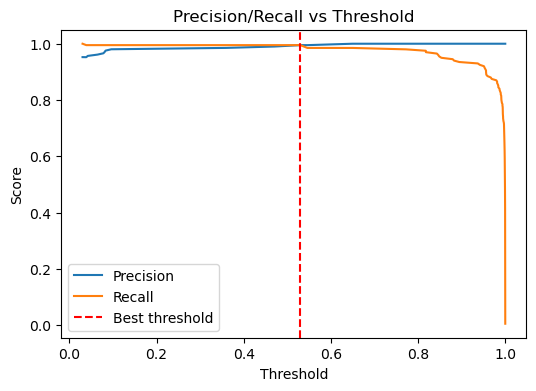

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# 1️⃣ Split stratifié
# -----------------------------
X_train = X_train.drop(columns=['index_original'], errors='ignore')
X_test = X_test.drop(columns=['index_original'], errors='ignore')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 2️⃣ Standardisation
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# 3️⃣ Appliquer SMOTE si besoin
# -----------------------------
apply_smote = True  # changer à False si tu veux tester sans SMOTE
if apply_smote:
    smote = SMOTE(random_state=42)
    X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)
    print("Répartition après SMOTE :", dict(zip(*np.unique(y_train, return_counts=True))))

# -----------------------------
# 4️⃣ Créer et entraîner le modèle
# -----------------------------
model = LogisticRegression(
    solver='saga',
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train_scaled, y_train)

# -----------------------------
# 5️⃣ Prédictions probabilités
# -----------------------------
y_proba = model.predict_proba(X_test_scaled)[:,1]  # probabilité classe 1

# -----------------------------
# 6️⃣ Choisir seuil optimal basé sur le max F1-score
# -----------------------------
prec, rec, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (prec * rec) / (prec + rec)
best_thresh = thresholds[np.argmax(f1_scores)]
print("Seuil optimal basé sur F1-score :", best_thresh)

y_pred = (y_proba >= best_thresh).astype(int)

# -----------------------------
# 7️⃣ Évaluation
# -----------------------------
print("\nClassification report :\n", classification_report(y_test, y_pred))
print("\nConfusion matrix :\n", confusion_matrix(y_test, y_pred))

# -----------------------------
# 8️⃣ Visualiser Precision/Recall vs Threshold
# -----------------------------
plt.figure(figsize=(6,4))
plt.plot(thresholds, prec[:-1], label='Precision')
plt.plot(thresholds, rec[:-1], label='Recall')
plt.axvline(best_thresh, color='red', linestyle='--', label='Best threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision/Recall vs Threshold')
plt.legend()
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['saga']
}

grid = GridSearchCV(LogisticRegression(
    max_iter=2000,
    class_weight='balanced'
), param_grid, cv=5, scoring='f1')

grid.fit(X_train_scaled, y_train)

print("Meilleurs paramètres :", grid.best_params_)
best_model = grid.best_estimator_


Meilleurs paramètres : {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}


- Calculez l'accuracy du modele

In [26]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle :", accuracy)
accuracy_2dec = round(accuracy, 2)
accuracy_2dec

Précision du modèle : 0.9933333333333333


0.99

- Rapport de classification

In [27]:
from sklearn.metrics import classification_report
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))


Rapport de classification :
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       100
        True       0.99      0.99      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [28]:
df_compare = pd.DataFrame({
    'b_reel': y_test.values,
    'b_pred': y_pred
})

df_compare.head(10)

,b_reel,b_pred
0,True,1
1,False,0
2,False,0
3,True,1
4,True,1
5,True,1
6,True,1
7,True,1
8,True,1
9,True,1


<div style=" background-color: green" >

<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center"> 4.1.2- K-means
</h2>

</div>

- Entrainnement du modéle

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_scaled)


KMeans(n_clusters=2, random_state=42)

- Prédiction des clusters sur le jeu de test

In [30]:
import pandas as pd

train_clusters = pd.Series(kmeans.labels_, index=y_train.index)


- Association clusters → classes vraies

In [31]:
mapping = train_clusters.to_frame(name='cluster') \
    .join(y_train.to_frame(name='class')) \
    .groupby('cluster')['class'] \
    .agg(lambda x: x.mode()[0])


- Récupérer les clusters des données d’entraînement

In [32]:
test_clusters = pd.Series(kmeans.predict(X_test_scaled))


- Conversion des clusters en classes prédites grâce au mapping



In [33]:
y_pred_kmeans = test_clusters.map(mapping).values


-  Calculez l'accuracy du modele

In [34]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_kmeans)
print(f"Précision du modèle K-Means : {accuracy:.2f}")


Précision du modèle K-Means : 0.99


<div style=" background-color: green" >

<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center"> 4.1.3- KNN
</h2>

</div>

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

- Création et entraînement du modèle

In [36]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

- Prédiction

In [37]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

y_pred_knn = knn_model.predict(X_test_scaled)

- Précision du modèle

In [38]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(" Précision du modèle KNN :", round(accuracy_knn, 2))

 Précision du modèle KNN : 0.99


-  Matrice de Confusion & Rapport de Classification :

In [39]:
print("=== Évaluation KNN ===")
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Matrice de confusion :\n", cm_knn)
print(classification_report(y_test, y_pred_knn))

=== Évaluation KNN ===
Matrice de confusion :
 [[ 99   1]
 [  3 197]]
              precision    recall  f1-score   support

       False       0.97      0.99      0.98       100
        True       0.99      0.98      0.99       200

    accuracy                           0.99       300
   macro avg       0.98      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



<div style=" background-color: green" >

<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center"> 4.1.4- Random Forest
</h2>

</div>

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

- Création et entraînement du modèle

In [41]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

- Prédictions

In [42]:
y_pred_rf = rf_model.predict(X_test_scaled)

- Évaluation

In [43]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Précision du modèle Random Forest :", round(accuracy_rf, 2))

Précision du modèle Random Forest : 0.99


- Matrice de confusion

In [44]:
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_rf))

Matrice de confusion :
[[ 98   2]
 [  2 198]]


- Rapport de classification

In [45]:
print(" Rapport de classification :")
print(classification_report(y_test, y_pred_rf))

 Rapport de classification :
              precision    recall  f1-score   support

       False       0.98      0.98      0.98       100
        True       0.99      0.99      0.99       200

    accuracy                           0.99       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.99      0.99      0.99       300



- enregistrer le modele

In [47]:
import joblib

model_filename ='logistic_regression_model_v1_5_1_04_08_2025.sav'

joblib.dump(model,model_filename)

['logistic_regression_model_v1_5_1_04_08_2025.sav']

- enregistrer la normalisation

In [48]:
scaler_filename = 'scaler_04_08_2025.sav'


joblib.dump(scaler, scaler_filename)

['scaler_04_08_2025.sav']

In [49]:
 print("\nClassification report :\n", classification_report(y_test, y_pred))
print("\nConfusion matrix :\n", confusion_matrix(y_test, y_pred))


Classification report :
               precision    recall  f1-score   support

       False       0.99      0.99      0.99       100
        True       0.99      0.99      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


Confusion matrix :
 [[ 99   1]
 [  1 199]]
